In [2]:
"""
Briar Doty
AMATH 584 - HW5
12/1/20
Full repository available at https://github.com/briardoty/amath584/tree/main/hw5
"""

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [35]:
# 1a - generate a symmetric matrix A and find its eigenvalues/vectors

def get_sym(m):
    A = np.zeros((m,m))
    
    for i in range(m):
        for j in range(i,m):
            r = np.random.rand()
            A[i,j] = r
            A[j,i] = r
    
    return A

A = get_sym(10)
w, v = np.linalg.eig(A)
print(w)

[ 5.75991252 -1.02865299 -0.79592572 -0.57495087 -0.38256266 -0.13599609
  0.36909377  1.17990254  0.86303555  0.97022023]


In [37]:
# 1bi - find the largest eigenvalue with the power iteration method

def get_largest_eig(A, k=100):
    
    # guess first eigenvector
    x = A[:,0]
    xnorm = np.linalg.norm(x)
    x = np.divide(x, xnorm)

    # iterate
    for i in range(k):
        x = A@x
        xnorm = np.linalg.norm(x)
        x = np.divide(x, xnorm)
        lmbda = x.T@A@x
        
    return lmbda, x

lmbda, x = get_largest_eig(A)
    
# error
err = np.sqrt((lmbda - w[0])**2)
print(f"Error: {err}")


Error: 5.329070518200751e-15


[Text(0.0, 0, '1'),
 Text(0.5, 0, '2'),
 Text(1.0, 0, '5'),
 Text(1.5, 0, '10'),
 Text(2.0, 0, '100'),
 Text(2.5, 0, '1000')]

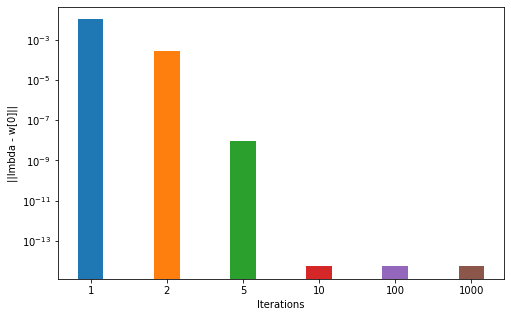

In [43]:
# 1bii - compare accuracy as a function of iterations
iteration_arr = [1, 2, 5, 10, 100, 1000]

# fig
fig, ax = plt.subplots(figsize=(8,5))
ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
xpos, width = 0, 1/len(iteration_arr)
labels, ticks = [], []

# different iterations k
for k in iteration_arr:
    
    # call fn
    lmbda, x = get_largest_eig(A, k)
    
    # error
    err = np.sqrt((lmbda - w[0])**2)
    
    # plot
    l = f"{k}"
    labels.append(l)
    ticks.append(xpos)
    ax.bar(xpos, err, width, label=l)
    xpos += 0.5
    
# plot info
ax.set_xlabel("Iterations")
ax.set_ylabel("||lmbda - w[0]||")
ax.set_xticks(ticks)
ax.set_yscale("log")
ax.set_xticklabels(labels)

In [ ]:
# 1c - Rayleight quotient iterations
